In [84]:
import pandas as pd
import matplotlib.pyplot as plt

In [85]:
filename = '/Users/davidlichacz/Downloads/ultimate_challenge/logins.json' 

In [86]:
# Import file
logins = pd.read_json(filename)

In [87]:
# Examine dataframe.
logins.head(10)

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21
5,1970-01-01 20:21:41
6,1970-01-01 20:12:16
7,1970-01-01 20:35:47
8,1970-01-01 20:35:38
9,1970-01-01 20:47:52


In [88]:
logins.tail(10)

,login_time
93132,1970-04-13 18:36:53
93133,1970-04-13 18:40:31
93134,1970-04-13 18:46:06
93135,1970-04-13 18:40:40
93136,1970-04-13 18:48:52
93137,1970-04-13 18:50:19
93138,1970-04-13 18:43:56
93139,1970-04-13 18:54:02
93140,1970-04-13 18:57:38
93141,1970-04-13 18:54:23


The data covers a time frame of January 1, 1970 to April 13, 1970.

In [89]:
logins.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 93142 entries, 0 to 93141
Data columns (total 1 columns):
login_time    93142 non-null datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 1.4 MB


In [90]:
# Aggregate login counts based on 15 minute intervals.
logins.set_index('login_time', inplace=True)
logins['count'] = 1
logins_15min= logins.resample('15Min').sum()

In [91]:
# Examine new dataframe.
logins_15min.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9788 entries, 1970-01-01 20:00:00 to 1970-04-13 18:45:00
Freq: 15T
Data columns (total 1 columns):
count    9381 non-null float64
dtypes: float64(1)
memory usage: 152.9 KB


There are some null entries in the new dataframe.  These are intervals that had zero logins.  Let's replace these null valuses with zero.

In [92]:
logins_15min.fillna(0, inplace=True)

In [93]:
logins_15min.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9788 entries, 1970-01-01 20:00:00 to 1970-04-13 18:45:00
Freq: 15T
Data columns (total 1 columns):
count    9788 non-null float64
dtypes: float64(1)
memory usage: 152.9 KB


All null values are now removed.

Let's plot the time series for the entire period.

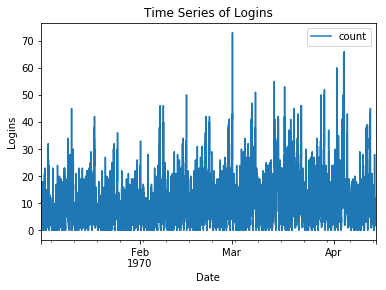

In [96]:
logins_15min.plot()
plt.title('Time Series of Logins')
plt.xlabel("Date")
plt.ylabel('Logins')
plt.show()

There is a clear cylical pattern evident.  Let's break things down into smaller time frames to explore further.

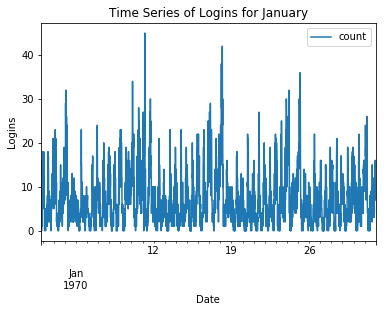

In [97]:
logins_15min.loc['1970-01'].plot()
plt.title('Time Series of Logins for January')
plt.xlabel("Date")
plt.ylabel('Logins')
plt.show()

The same cyclical pattern is present for the month of January.  Let's now look at each week (Monday-Sunday) for January.

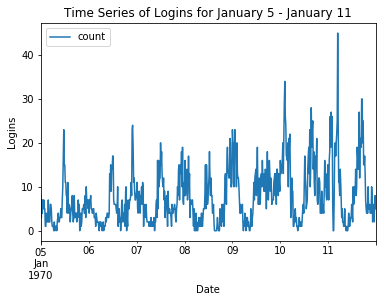

In [98]:
logins_15min.loc['1970-01-05':'1970-01-11'].plot()
plt.title('Time Series of Logins for January 5 - January 11')
plt.xlabel("Date")
plt.ylabel('Logins')
plt.show()

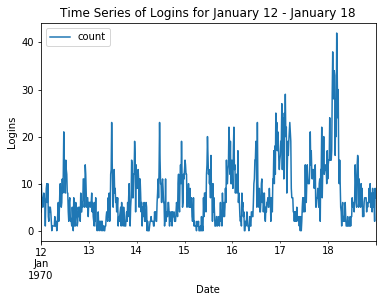

In [99]:
logins_15min.loc['1970-01-12':'1970-01-18'].plot()
plt.title('Time Series of Logins for January 12 - January 18')
plt.xlabel("Date")
plt.ylabel('Logins')
plt.show()

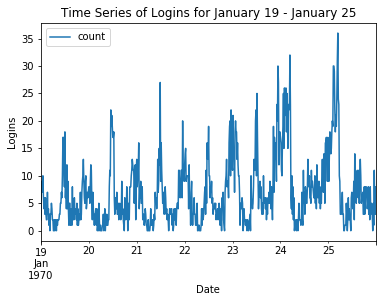

In [100]:
logins_15min.loc['1970-01-19':'1970-01-25'].plot()
plt.title('Time Series of Logins for January 19 - January 25')
plt.xlabel("Date")
plt.ylabel('Logins')
plt.show()

Each week shows a similar cyclical pattern with the highest peaks coming on the weekends.  Let's now take a random week and look at each day.

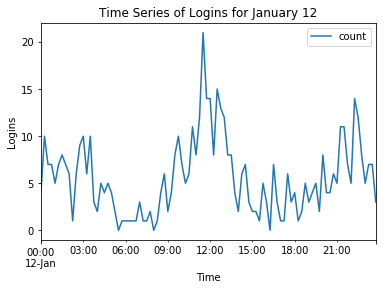

In [102]:
logins_15min.loc['1970-01-12'].plot()
plt.title('Time Series of Logins for January 12')
plt.xlabel("Time")
plt.ylabel('Logins')
plt.show()

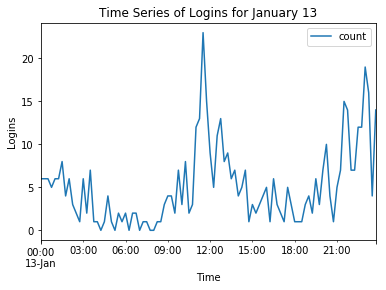

In [103]:
logins_15min.loc['1970-01-13'].plot()
plt.title('Time Series of Logins for January 13')
plt.xlabel("Time")
plt.ylabel('Logins')
plt.show()

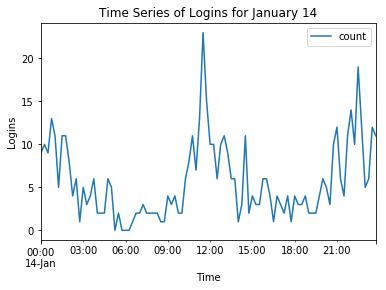

In [104]:
logins_15min.loc['1970-01-14'].plot()
plt.title('Time Series of Logins for January 14')
plt.xlabel("Time")
plt.ylabel('Logins')
plt.show()

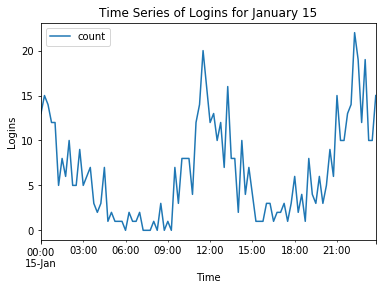

In [105]:
logins_15min.loc['1970-01-15'].plot()
plt.title('Time Series of Logins for January 15')
plt.xlabel("Time")
plt.ylabel('Logins')
plt.show()

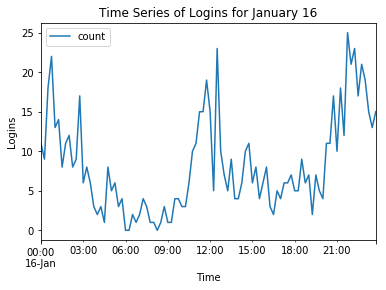

In [106]:
logins_15min.loc['1970-01-16'].plot()
plt.title('Time Series of Logins for January 16')
plt.xlabel("Time")
plt.ylabel('Logins')
plt.show()

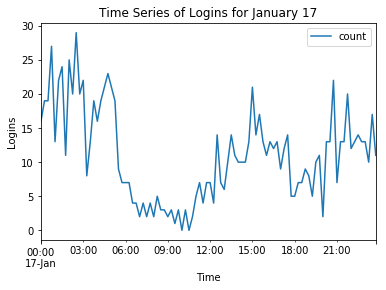

In [107]:
logins_15min.loc['1970-01-17'].plot()
plt.title('Time Series of Logins for January 17')
plt.xlabel("Time")
plt.ylabel('Logins')
plt.show()

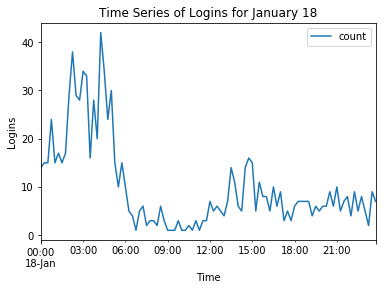

In [108]:
logins_15min.loc['1970-01-18'].plot()
plt.title('Time Series of Logins for January 18')
plt.xlabel("Time")
plt.ylabel('Logins')
plt.show()

These plots show two different patterns: The weekdays always show the highest number of logins around noon and midnight.  The weekends show that the highest usage comes between the hours of midnight and 6am.

To conclude, the exploratory analysis show us the following patterns.
- Login usage show a cyclical pattern that increases in frequency on the weekends.
- Daily usage patterns depends on the day.
- Weekday usage tends to peak at noon and midnight.
- Weekend usage shows its highest values in the late night/early morning hours.